In [ ]:
#Problem Statement: 
# 1) Extract reviews of any product from ecommerce website like amazon
# 2) Perform emotion mining


Here SanDisk Ultra Dual Drive Luxe USB 3.0, USB 2.0 Type-C 256GB, is choosen as the product from amazon for review analysis and emotion mining. Data scraping from web is as follows.

In [ ]:
#Importing reqd libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [ ]:
#Web scraping
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/SanDisk-Ultra-Drive-Flash-256GB/dp/B084PJR41Z/ref=sr_1_1_sspa?crid=V0UH6F2TKB6G&keywords=PENDRIVE&qid=1676971315&sprefix=pendrive%2Caps%2C416&sr=8-1-spons&sp_csd=d2lkZ2V0TmFtZT1zcF9hdGY&psc=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [ ]:
# Function to loop through multiple pages since the product has 20000+reviews
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [ ]:
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [ ]:
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [ ]:
for x in tqdm_notebook(range(1,100)):
    soup = get_soup(f'https://www.amazon.in/SanDisk-Ultra-Drive-Flash-256GB/product-reviews/B084PJR41Z/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

<ipython-input-7-8f86420341c2>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,100)):


  0%|          | 0/99 [00:00<?, ?it/s]

In [ ]:
df = pd.DataFrame(reviewlist)

In [ ]:
#Exporting the data to csv
df.to_csv(r"C:\Users\Nithesh Shetty\ExcelR\DS\Assignment\Text mining\reviews.csv")

In [ ]:
df.to_csv("reviews.csv")

In [ ]:
#Importing reqd libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import spacy
from tqdm.notebook import tqdm_notebook
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor
from sklearn.feature_extraction.text import CountVectorizer 

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [ ]:
# loading the dataset
reviews=pd.read_csv('reviews.csv')
reviews

,Unnamed: 0,Rating,Title,Review,Review_Date
0,0,4.0,Satisfied,Honestly working well. You will get a heating ...,16 February 2023
1,1,4.0,"It heats rapidly & read speed is 35 , write sp...",This product is Nice 👍 BUT when it heats to mu...,13 February 2023
2,2,4.0,very good prodact,Good prodact I'm happy,20 February 2023
3,3,4.0,Overall Good,I'm confused if it has 460GB or 494GB of stora...,24 January 2023
4,4,4.0,Balanced making,Got heated very fastly,9 February 2023
...,...,...,...,...,...
985,985,4.0,Other wise is good,At the Time of data transfer pen drive hit ver...,1 August 2021
986,986,3.0,Write speed is slow,Product quality is good but write speed is slo...,26 December 2021
987,987,5.0,Super faster,Super fast data transfer and handy to use,13 May 2022
988,988,3.0,Well the speed rate changes,It said that it was made in India but when it ...,29 September 2021


In [ ]:
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)

In [ ]:
reviews.Rating.describe()

count    990.000000
mean       3.983838
std        1.054501
min        1.000000
25%        3.250000
50%        4.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

In [ ]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,Honestly working well. You will get a heating ...,28
1,This product is Nice 👍 BUT when it heats to mu...,39
2,Good prodact I'm happy,4
3,I'm confused if it has 460GB or 494GB of stora...,54
4,Got heated very fastly,4


In [ ]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,Honestly working well. You will get a heating ...,180.0
1,This product is Nice 👍 BUT when it heats to mu...,192.0
2,Good prodact I'm happy,22.0
3,I'm confused if it has 460GB or 494GB of stora...,292.0
4,Got heated very fastly,22.0


In [ ]:
#Average word length
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,Honestly working well. You will get a heating ...,5.464286
1,This product is Nice 👍 BUT when it heats to mu...,3.948718
2,Good prodact I'm happy,4.750000
3,I'm confused if it has 460GB or 494GB of stora...,4.425926
4,Got heated very fastly,4.750000


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving stop.txt to stop (5).txt


In [ ]:
#No. of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,Honestly working well. You will get a heating ...,8
1,This product is Nice 👍 BUT when it heats to mu...,11
2,Good prodact I'm happy,0
3,I'm confused if it has 460GB or 494GB of stora...,19
4,Got heated very fastly,1


In [ ]:
#Spelling correction
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))


0    Honestly working well. You will get a heating ...
1    His product is Vice 👍 BUT when it heat to much...
2                               Good product I'm happy
3    I'm confused if it has 460GB or 494GB of stora...
4                               Not heated very lastly
Name: Review, dtype: object

In [ ]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0      16
1      13
2      20
3      24
4       9
       ..
985     1
986    26
987    13
988    29
989     2
Name: Review_Date, Length: 990, dtype: object 
 0       February
1       February
2       February
3        January
4       February
         ...    
985       August
986     December
987          May
988    September
989         June
Name: Review_Date, Length: 990, dtype: object 
 0      2023
1      2023
2      2023
3      2023
4      2023
       ... 
985    2021
986    2021
987    2022
988    2021
989    2022
Name: Review_Date, Length: 990, dtype: object


In [ ]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,16,February,2023
1,13,February,2023
2,20,February,2023
3,24,January,2023
4,9,February,2023
...,...,...,...
985,1,August,2021
986,26,December,2021
987,13,May,2022
988,29,September,2021


In [ ]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,2
1,2
2,2
3,January
4,2
...,...
985,August
986,December
987,5
988,September


Text Preprocessing

In [ ]:
data = df[['Review']]

In [ ]:
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

<ipython-input-25-03e14da74b20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \


Lemmatization

In [ ]:
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


  0%|          | 0/990 [00:00<?, ?it/s]

In [ ]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,honestly working well get heating problem conn...,Honestly working well. You will get a heating ...
1,product nice heat much file transfer speed bec...,This product is Nice 👍 BUT when it heats to mu...
2,good prodact happy,Good prodact I'm happy
3,confused gb gb storage heating main issue pend...,I'm confused if it has 460GB or 494GB of stora...
4,got heated fastly,Got heated very fastly


Preprocessing Key Words

In [ ]:
#Removing @names
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [ ]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,honestly working well get heating problem conn...,Honestly working well. You will get a heating ...
1,product nice heat much file transfer speed bec...,This product is Nice 👍 BUT when it heats to mu...
2,good prodact happy,Good prodact I'm happy
3,confused gb gb storage heating main issue pend...,I'm confused if it has 460GB or 494GB of stora...
4,got heated fastly,Got heated very fastly
5,ok product nothing fancy serf purpose though t...,Ok products nothing so fancy about it . Serves...
6,great product support usb mentioned discription,Great product but does not support USB 2.0 as ...
7,heating problem,But heating problem
8,copying phone usb slow second speed go upto mb...,**Copying from phone to usb is very slow. For ...
9,got made malaysia variant got say fast thought...,"I got the made in Malaysia variant, I got to s..."


In [ ]:
#Removing Links
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,honestly working well get heating problem conn...,Honestly working well. You will get a heating ...
1,product nice heat much file transfer speed bec...,This product is Nice 👍 BUT when it heats to mu...
2,good prodact happy,Good prodact I'm happy
3,confused gb gb storage heating main issue pend...,I'm confused if it has 460GB or 494GB of stora...
4,got heated fastly,Got heated very fastly
5,ok product nothing fancy serf purpose though t...,Ok products nothing so fancy about it . Serves...
6,great product support usb mentioned discription,Great product but does not support USB 2.0 as ...
7,heating problem,But heating problem
8,copying phone usb slow second speed go upto mb...,**Copying from phone to usb is very slow. For ...
9,got made malaysia variant got say fast thought...,"I got the made in Malaysia variant, I got to s..."


In [ ]:
#Removing Review with empty text
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,honestly working well get heating problem conn...,Honestly working well. You will get a heating ...
1,product nice heat much file transfer speed bec...,This product is Nice 👍 BUT when it heats to mu...
2,good prodact happy,Good prodact I'm happy
3,confused gb gb storage heating main issue pend...,I'm confused if it has 460GB or 494GB of stora...
4,got heated fastly,Got heated very fastly
5,ok product nothing fancy serf purpose though t...,Ok products nothing so fancy about it . Serves...
6,great product support usb mentioned discription,Great product but does not support USB 2.0 as ...
7,heating problem,But heating problem
8,copying phone usb slow second speed go upto mb...,**Copying from phone to usb is very slow. For ...
9,got made malaysia variant got say fast thought...,"I got the made in Malaysia variant, I got to s..."


In [ ]:
#Dropping duplicate rows
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,honestly working well get heating problem conn...,Honestly working well. You will get a heating ...
1,product nice heat much file transfer speed bec...,This product is Nice 👍 BUT when it heats to mu...
2,good prodact happy,Good prodact I'm happy
3,confused gb gb storage heating main issue pend...,I'm confused if it has 460GB or 494GB of stora...
4,got heated fastly,Got heated very fastly
5,ok product nothing fancy serf purpose though t...,Ok products nothing so fancy about it . Serves...
6,great product support usb mentioned discription,Great product but does not support USB 2.0 as ...
7,heating problem,But heating problem
8,copying phone usb slow second speed go upto mb...,**Copying from phone to usb is very slow. For ...
9,got made malaysia variant got say fast thought...,"I got the made in Malaysia variant, I got to s..."


In [ ]:
#Reseting Index
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,honestly working well get heating problem conn...,Honestly working well. You will get a heating ...
1,product nice heat much file transfer speed bec...,This product is Nice 👍 BUT when it heats to mu...
2,good prodact happy,Good prodact I'm happy
3,confused gb gb storage heating main issue pend...,I'm confused if it has 460GB or 494GB of stora...
4,got heated fastly,Got heated very fastly
5,ok product nothing fancy serf purpose though t...,Ok products nothing so fancy about it . Serves...
6,great product support usb mentioned discription,Great product but does not support USB 2.0 as ...
7,heating problem,But heating problem
8,copying phone usb slow second speed go upto mb...,**Copying from phone to usb is very slow. For ...
9,got made malaysia variant got say fast thought...,"I got the made in Malaysia variant, I got to s..."


In [ ]:
#Removing special characters

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,honestly working well get heating problem conn...,Honestly working well. You will get a heating ...
1,product nice heat much file transfer speed bec...,This product is Nice 👍 BUT when it heats to mu...
2,good prodact happy,Good prodact I'm happy
3,confused gb gb storage heating main issue pend...,I'm confused if it has 460GB or 494GB of stora...
4,got heated fastly,Got heated very fastly
5,ok product nothing fancy serf purpose though t...,Ok products nothing so fancy about it . Serves...
6,great product support usb mentioned discription,Great product but does not support USB 2.0 as ...
7,heating problem,But heating problem
8,copying phone usb slow second speed go upto mb...,**Copying from phone to usb is very slow. For ...
9,got made malaysia variant got say fast thought...,"I got the made in Malaysia variant, I got to s..."


In [ ]:
#Function to remove emoji

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)


,Clean_Reviews,Uncleaned_Reviews
0,honestly working well get heating problem conn...,Honestly working well. You will get a heating ...
1,product nice heat much file transfer speed bec...,This product is Nice 👍 BUT when it heats to mu...
2,good prodact happy,Good prodact I'm happy
3,confused gb gb storage heating main issue pend...,I'm confused if it has 460GB or 494GB of stora...
4,got heated fastly,Got heated very fastly
5,ok product nothing fancy serf purpose though t...,Ok products nothing so fancy about it . Serves...
6,great product support usb mentioned discription,Great product but does not support USB 2.0 as ...
7,heating problem,But heating problem
8,copying phone usb slow second speed go upto mb...,**Copying from phone to usb is very slow. For ...
9,got made malaysia variant got say fast thought...,"I got the made in Malaysia variant, I got to s..."


In [ ]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,honestly working well get heating problem conn...,Honestly working well. You will get a heating ...,"[honestly, working, well, get, heating, proble..."
1,product nice heat much file transfer speed bec...,This product is Nice 👍 BUT when it heats to mu...,"[product, nice, heat, much, file, transfer, sp..."
2,good prodact happy,Good prodact I'm happy,"[good, prodact, happy]"
3,confused gb gb storage heating main issue pend...,I'm confused if it has 460GB or 494GB of stora...,"[confused, gb, gb, storage, heating, main, iss..."
4,got heated fastly,Got heated very fastly,"[got, heated, fastly]"
5,ok product nothing fancy serf purpose though t...,Ok products nothing so fancy about it . Serves...,"[ok, product, nothing, fancy, serf, purpose, t..."
6,great product support usb mentioned discription,Great product but does not support USB 2.0 as ...,"[great, product, support, usb, mentioned, disc..."
7,heating problem,But heating problem,"[heating, problem]"
8,copying phone usb slow second speed go upto mb...,**Copying from phone to usb is very slow. For ...,"[copying, phone, usb, slow, second, speed, go,..."
9,got made malaysia variant got say fast thought...,"I got the made in Malaysia variant, I got to s...","[got, made, malaysia, variant, got, say, fast,..."


In [ ]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving stop.txt to stop (6).txt


In [ ]:
#Removing Stop words

import codecs
with codecs.open("stop.txt","r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [ ]:
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,honestly working well get heating problem conn...,Honestly working well. You will get a heating ...
1,product nice heat much file transfer speed bec...,This product is Nice 👍 BUT when it heats to mu...
2,good prodact happy,Good prodact I'm happy
3,confused gb gb storage heating main issue pend...,I'm confused if it has 460GB or 494GB of stora...
4,got heated fastly,Got heated very fastly
5,ok product nothing fancy serf purpose though t...,Ok products nothing so fancy about it . Serves...
6,great product support usb mentioned discription,Great product but does not support USB 2.0 as ...
7,heating problem,But heating problem
8,copying phone usb slow second speed go upto mb...,**Copying from phone to usb is very slow. For ...
9,got made malaysia variant got say fast thought...,"I got the made in Malaysia variant, I got to s..."


Tokenization

In [ ]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['product', 'nice', 'heat', 'much', 'file', 'transfer', 'speed', 'become', 'fluctuat', 'slow', 'biggest', 'problem', 'amazon', 'showing', 'product', 'made', 'india', 'made', 'china'])

In [ ]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [honestly, working, well, get, heating, proble...
1    [product, nice, heat, much, file, transfer, sp...
2                               [good, prodact, happy]
3    [confused, gb, gb, storage, heating, main, iss...
4                                [got, heated, fastly]
5    [ok, product, nothing, fancy, serf, purpose, t...
6    [great, product, support, usb, mentioned, disc...
7                                   [heating, problem]
8    [copying, phone, usb, slow, second, speed, go,...
9    [got, made, malaysia, variant, got, say, fast,...
Name: Clean_Reviews, dtype: object

Converting words to stemmer

In [ ]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [ ]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))

In [ ]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,stemmed
0,honestly working well get heating problem conn...
1,product nice heat much file transfer speed bec...
2,good prodact happy
3,confused gb gb storage heating main issue pend...
4,got heated fastly
...,...
977,time data transfer pen drive hit quickly mater...
978,product quality good write speed slowtype c po...
979,super fast data transfer handy use
980,said made india came malaysia glad china reduc...


Applying count vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [ ]:
print(cv.get_feature_names()[109:200])

['attach', 'attached', 'attaching', 'attractive', 'atually', 'audio', 'automatically', 'available', 'avarage', 'average', 'avg', 'avoid', 'awasome', 'away', 'awesome', 'awesomemain', 'awsome', 'back', 'background', 'backing', 'backup', 'backuphowever', 'bad', 'badi', 'badly', 'badmead', 'bag', 'bahut', 'ball', 'bare', 'basically', 'basis', 'bataya', 'battery', 'bcoz', 'bdo', 'beast', 'beat', 'beautiful', 'beautifully', 'became', 'become', 'becomes', 'becoming', 'becoz', 'begin', 'beginning', 'belief', 'believe', 'benchmark', 'benefit', 'besides', 'best', 'bestproduct', 'better', 'betterand', 'beware', 'bhi', 'big', 'biger', 'bigger', 'biggest', 'biild', 'bike', 'billion', 'bit', 'bitrate', 'bizarre', 'black', 'blindly', 'bluetooth', 'bodied', 'body', 'bodycomes', 'bohot', 'boil', 'boiling', 'bolte', 'book', 'boost', 'bore', 'bos', 'bothered', 'bothering', 'bought', 'box', 'brand', 'branding', 'break', 'breaker', 'breaking']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/982 [00:00<?, ?it/s]

In [ ]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [ ]:
X.shape

(982, 5000)

In [ ]:
cv.get_feature_names()[:20]

['aati',
 'aati hai',
 'abl',
 'accept',
 'access',
 'accessori',
 'acchi',
 'act',
 'action',
 'actual',
 'actual capac',
 'actual capac gb',
 'actual gb',
 'actual storag',
 'addit',
 'adjust',
 'advantag',
 'advertis',
 'af',
 'afraid']

In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

,aati,aati hai,abl,accept,access,accessori,acchi,act,action,actual,...,write speed usb,wrong,ye,ye realli,year,year warranti,yet,yr,zone,zone app
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TF-IDF Vectorizer

In [ ]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/982 [00:00<?, ?it/s]

In [ ]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [ ]:
tfidf_v.get_feature_names()[:20]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aati',
 'aati hai',
 'abl',
 'accept',
 'access',
 'accessori',
 'acchi',
 'act',
 'action',
 'actual',
 'actual capac',
 'actual capac gb',
 'actual gb',
 'actual storag',
 'addit',
 'adjust',
 'advantag',
 'advertis',
 'af',
 'afraid']

In [ ]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df

,aati,aati hai,abl,accept,access,accessori,acchi,act,action,actual,...,write speed usb,wrong,ye,ye realli,year,year warranti,yet,yr,zone,zone app
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Named Entity Recognition

In [ ]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'honestly working well get heating problem connect mobile phone otherwise working fine average transport speed well space everything fine product nice heat much file transfer speed become fluctuat slow biggest problem amazon showing product made india made china good prodact happy confused gb gb storage heating main issue pendrive used realme pro transfer video pendrive took around minute transfer file gb speed may slow android smartphone get faster speed window mac got heated fastly ok product nothing fancy serf purpose though tinny hard manage worth getting lost great product support usb mentioned discription heating problem copying phone usb slow second speed go upto mbps come around mbps transfer swivel action get loose feel cheap heating normal metal thing reading speed fast comparatively phone also working fast lg web tv got made malaysia variant got say fast thought get around mbps read minimum mbps write moving movie stuff one thing want mention heat much get wrong warm touch u

In [ ]:
#POS Tagging
nlp=spacy.load('en_core_web_sm')
one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
for token in doc_block[:50]:
    print(token,token.pos_)  

honestly ADV
working VERB
well ADV
get VERB
heating NOUN
problem NOUN
connect VERB
mobile ADJ
phone NOUN
otherwise ADV
working VERB
fine ADJ
average ADJ
transport NOUN
speed NOUN
well ADV
space VERB
everything PRON
fine ADJ
product NOUN
nice ADJ
heat NOUN
much ADJ
file NOUN
transfer NOUN
speed NOUN
become VERB
fluctuat NOUN
slow ADV
biggest ADJ
problem NOUN
amazon NOUN
showing VERB
product NOUN
made VERB
india PROPN
made VERB
china PROPN
good PROPN
prodact PROPN
happy ADJ
confused ADJ
gb PROPN
gb PROPN
storage NOUN
heating NOUN
main ADJ
issue NOUN
pendrive ADJ
used VERB


In [ ]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['used', 'got', 'speed', 'moving', 'file', 'think', 'value', 'money', 'speed', 'test', 'read', 'speed', 'usb', 'mb', 'usb', 'mb', 'usb', 'type', 'write', 'speed', 'usb', 'mb', 'usb', 'mb', 'usb', 'type', 'body', 'use', 'type', 'qualitycons', 'product', 'get', 'metal', 'body', 'getting', 'speed', 'said', 'heat', 'storage', 'given', 'gb', 'gb', 'drawback', 'needed', 'product', 'quality', 'metal', 'body', 'build', 'quality', 'time', 'metal', 'heat', 'lot', 'speed', 'reach', 'write', 'speed', 'cold', 'get', 'speed', 'get', 'purchased', 'varient', 'got', 'storage', 'product', 'medium', 'loaded', 'phone', 'use', 'heating', 'issue', 'heat', 'alot', 'speed', 'somtime', 'give', 'speed', 'say', 'value', 'money', 'want', 'type', 'preferred', 'metal', 'buy', 'varients', 'speed', 'heat', 'le', 'product', 'quality', 'use', 'problem', 'heating', 'speed', 'medium', 'loaded', 'getting']


In [ ]:
# Counting the noun & verb tokens
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10]

,word,count
0,speed,333
1,product,259
2,drive,172
3,metal,155
4,use,152
5,heat,147
6,heating,128
7,transfer,128
8,quality,128
9,get,123


<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

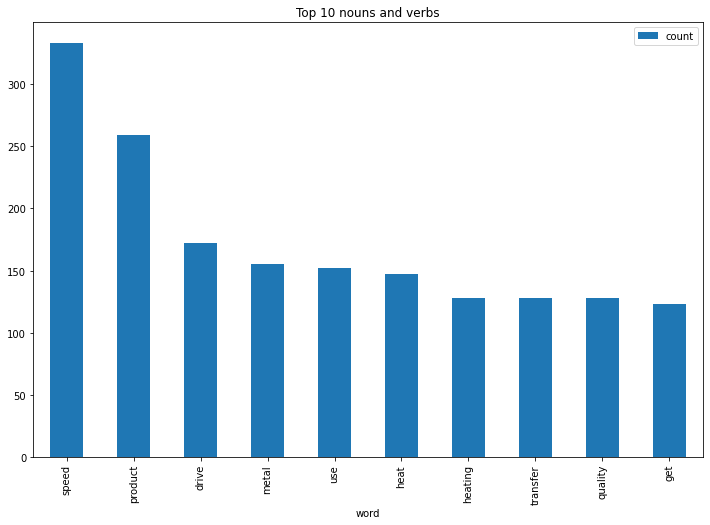

In [ ]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

Feature Extraction

In [ ]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

Fetch Sentiment

In [ ]:
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

In [ ]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,882
neg,100


In [ ]:
dataframe.Clean_Reviews[5]

'ok product nothing fancy serf purpose though tinny hard manage worth getting lost'

In [ ]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.065, 'neu': 0.935, 'pos': 0.0, 'compound': -0.3182}

In [ ]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,honestly working well get heating problem conn...,"{'neg': 0.102, 'neu': 0.491, 'pos': 0.408, 'co..."
1,product nice heat much file transfer speed bec...,"{'neg': 0.116, 'neu': 0.69, 'pos': 0.194, 'com..."
2,good prodact happy,"{'neg': 0.0, 'neu': 0.132, 'pos': 0.868, 'comp..."
3,confused gb gb storage heating main issue pend...,"{'neg': 0.073, 'neu': 0.927, 'pos': 0.0, 'comp..."
4,got heated fastly,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,honestly working well get heating problem conn...,"{'neg': 0.102, 'neu': 0.491, 'pos': 0.408, 'co...",0.7269
1,product nice heat much file transfer speed bec...,"{'neg': 0.116, 'neu': 0.69, 'pos': 0.194, 'com...",0.2023
2,good prodact happy,"{'neg': 0.0, 'neu': 0.132, 'pos': 0.868, 'comp...",0.7650
3,confused gb gb storage heating main issue pend...,"{'neg': 0.073, 'neu': 0.927, 'pos': 0.0, 'comp...",-0.3182
4,got heated fastly,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [ ]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,honestly working well get heating problem conn...,"{'neg': 0.102, 'neu': 0.491, 'pos': 0.408, 'co...",0.7269,Positive
1,product nice heat much file transfer speed bec...,"{'neg': 0.116, 'neu': 0.69, 'pos': 0.194, 'com...",0.2023,Positive
2,good prodact happy,"{'neg': 0.0, 'neu': 0.132, 'pos': 0.868, 'comp...",0.7650,Positive
3,confused gb gb storage heating main issue pend...,"{'neg': 0.073, 'neu': 0.927, 'pos': 0.0, 'comp...",-0.3182,Negative
4,got heated fastly,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
...,...,...,...,...
977,time data transfer pen drive hit quickly mater...,"{'neg': 0.28, 'neu': 0.72, 'pos': 0.0, 'compou...",-0.5423,Negative
978,product quality good write speed slowtype c po...,"{'neg': 0.238, 'neu': 0.538, 'pos': 0.223, 'co...",-0.0516,Negative
979,super fast data transfer handy use,"{'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'comp...",0.5994,Positive
980,said made india came malaysia glad china reduc...,"{'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'comp...",0.4588,Positive


<AxesSubplot:xlabel='sentiment', ylabel='count'>

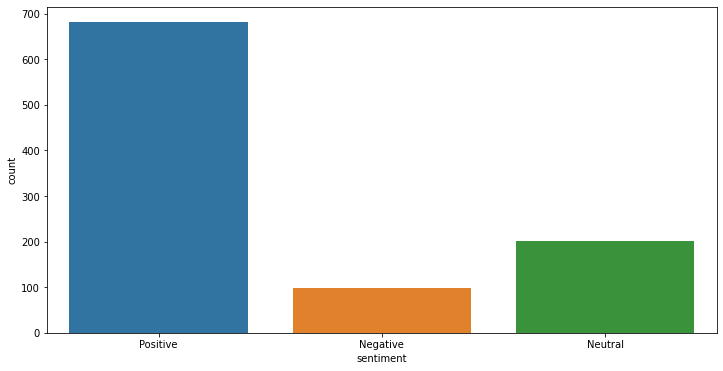

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='compound', ylabel='Density'>

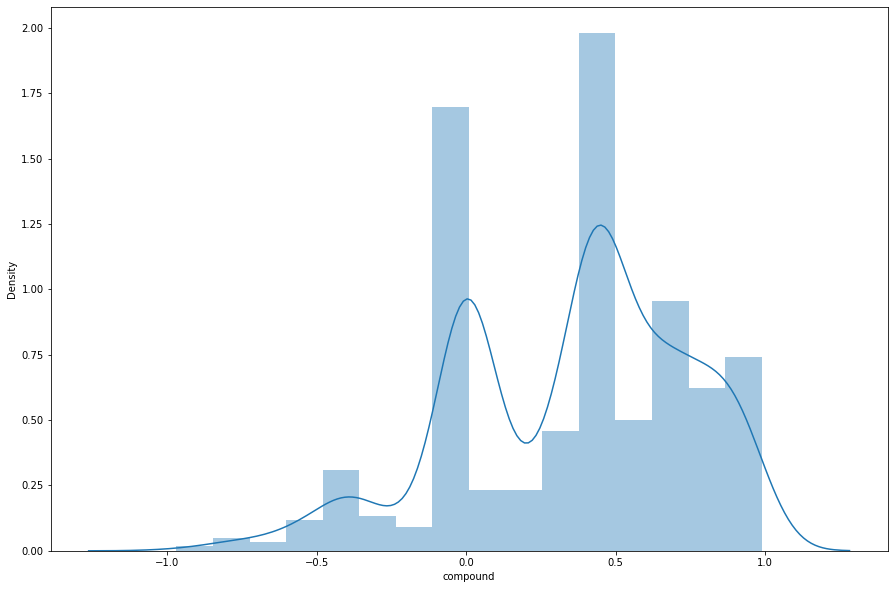

In [ ]:
# Plotting the sentiment value for whole review
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

In [ ]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,sentiment
0,honestly working well get heating problem conn...,Honestly working well. You will get a heating ...,pos
1,product nice heat much file transfer speed bec...,This product is Nice 👍 BUT when it heats to mu...,pos
2,good prodact happy,Good prodact I'm happy,pos
3,confused gb gb storage heating main issue pend...,I'm confused if it has 460GB or 494GB of stora...,neg
4,got heated fastly,Got heated very fastly,pos


In [ ]:
#Plotting wordcloud on possitive words

In [ ]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

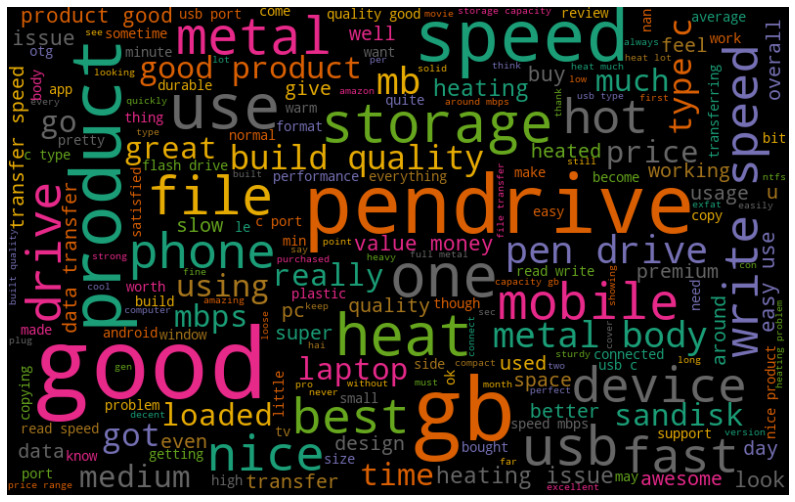

In [ ]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)